In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# The following lines make plots in dark mode look reasonable.  If you are not using dark
# mode you don't need them, but you can also just leave them here and it should work fine.

dark_mode = True
# plotting choices for dark-mode
if (dark_mode):
    from jupyterthemes import jtplot
    jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
    linecolor = 'w'
else:
    linecolor = 'k'

In [10]:
# Create a Pandas DataFrame with data for calibration of Torsion pendulum

# The values in this next line are for the WebWork exercise.
calibration_data = [[0.21, 0.003, 0.04, 0.006], [0.3205, 0.003, 0.06,0.006], [0.42, 0.003, 0.08, 0.006]]

# create dataframe
df = pd.DataFrame(calibration_data, columns = ['X', 'dX', 'Y', 'dY'])
df



,X,dX,Y,dY
0,0.2100,0.003,0.04,0.006
1,0.3205,0.003,0.06,0.006
2,0.4200,0.003,0.08,0.006


Beta: [ 0.1903037  -0.00029456]
Beta Std Error: [0.00575555 0.00188917]
Beta Covariance: [[ 0.00164616 -0.00052155]
 [-0.00052155  0.00017735]]
Residual Variance: 0.020123414405569372
Inverse Condition #: 0.06907812263625
Reason(s) for Halting:
  Sum of squares convergence

Final Result: Y = (0.190303705 +/- 0.005755550) X + (-0.000294557 +/- 0.001889167)


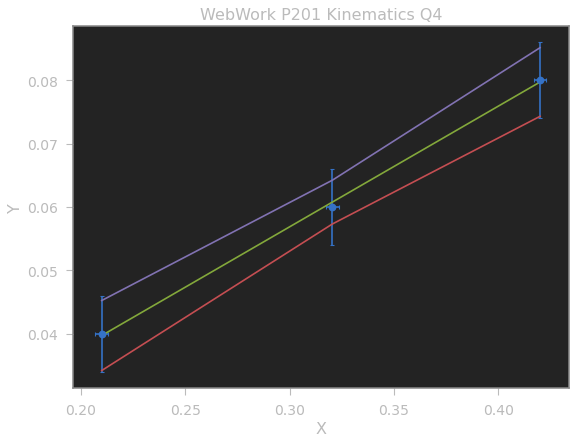

In [12]:
xi = df['X']
yi = df['Y']
sigmaxi = df['dX']
sigmayi = df['dY']

##############################

from scipy.odr import *

def fitfunction(B, x):
    '''Linear function y = m*x + b'''
    # B is a vector of the parameters.
    # x is an array of the current x values.
    # x is in the same format as the x passed to Data or RealData.
    #
    # Return an array in the same format as y passed to Data or RealData.
    return B[0]*x + B[1]

linear = Model(fitfunction) # create a Model object based on the fitfuncion we have defined
mydata = RealData(xi, yi, sx=sigmaxi, sy=sigmayi) # create a data object based on our data, include errors.
myodr = ODR(mydata, linear, beta0=[1., 2.]) # create a fitting object, based on the data, fit Model, and an intial set of parameters.
myoutput = myodr.run()  # run the fitting process to get optimized parameters!

myoutput.pprint() # print out the result of the fit

# Now assign the important fit results to some more convenient variables.

popt = myoutput.beta # the vector of optimized parameters
pcov = myoutput.cov_beta # the covariance matrix
perr = myoutput.sd_beta # the vector of ERRORS in the optimized parameters

# The following lines generate upper and lower 99% "Confidence Bands" on the fit, for visualization
# purposes.

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(pi,xi) for pi in ps])

lower = np.percentile(ysample,16.0,axis=0)
upper = np.percentile(ysample,84.0,axis=0)
middle = (lower+upper)/2.0

print()
print ("Final Result: Y = (%0.9f +/- %0.9f) X + (%0.9f +/- %0.9f)" % (popt[0],perr[0],popt[1],perr[1]))

plt.figure(figsize=(8, 6), dpi=80)

plt.errorbar(xi, yi, xerr=sigmaxi, yerr=sigmayi, fmt='o', capsize=2, capthick=1)

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)

#########################

plt.xlabel('X')
plt.ylabel('Y')
plt.title('WebWork P201 Kinematics Q4')
plt.show()

In [16]:
print(np.sqrt( 1.0/(.42-.21)**2*(2.0*.006*.006) + 
              (.08-.04)**2/(.42-.21)**4*(2.0*.003*.003) ))

0.04058893575558176
